# Data analyse

In [1]:
import pandas as pd
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Data filling with ... 

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
df = pd.DataFrame(imputer.fit_transform(df))
df = df.rename(columns = {0:'sex', 1:'age', 2:'education', 3:'currentSmoker', 4:'cigsPerDay', 5:'BPMeds',
       6:'prevalentStroke', 7:'prevalentHyp', 8:'diabetes', 9:'totChol', 10:'sysBP',
       11:'diaBP', 12:'BMI', 13:'heartRate', 14:'glucose', 15:'TenYearCHD'})
df = df.round()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


# Correlation with Target

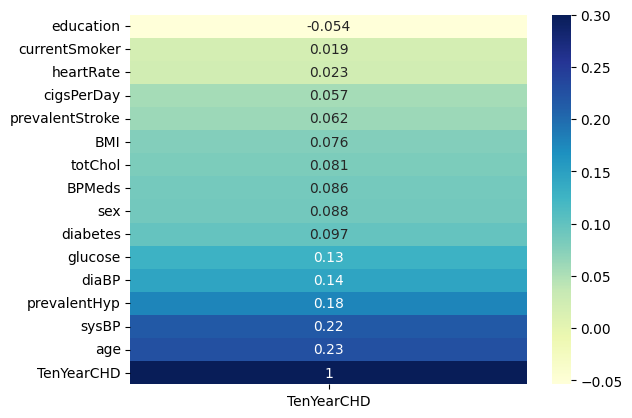

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr()[['TenYearCHD']].sort_values(by = 'TenYearCHD'),cmap = 'YlGnBu', annot = True, vmax = 0.3)
plt.show()

# Distribution of Values



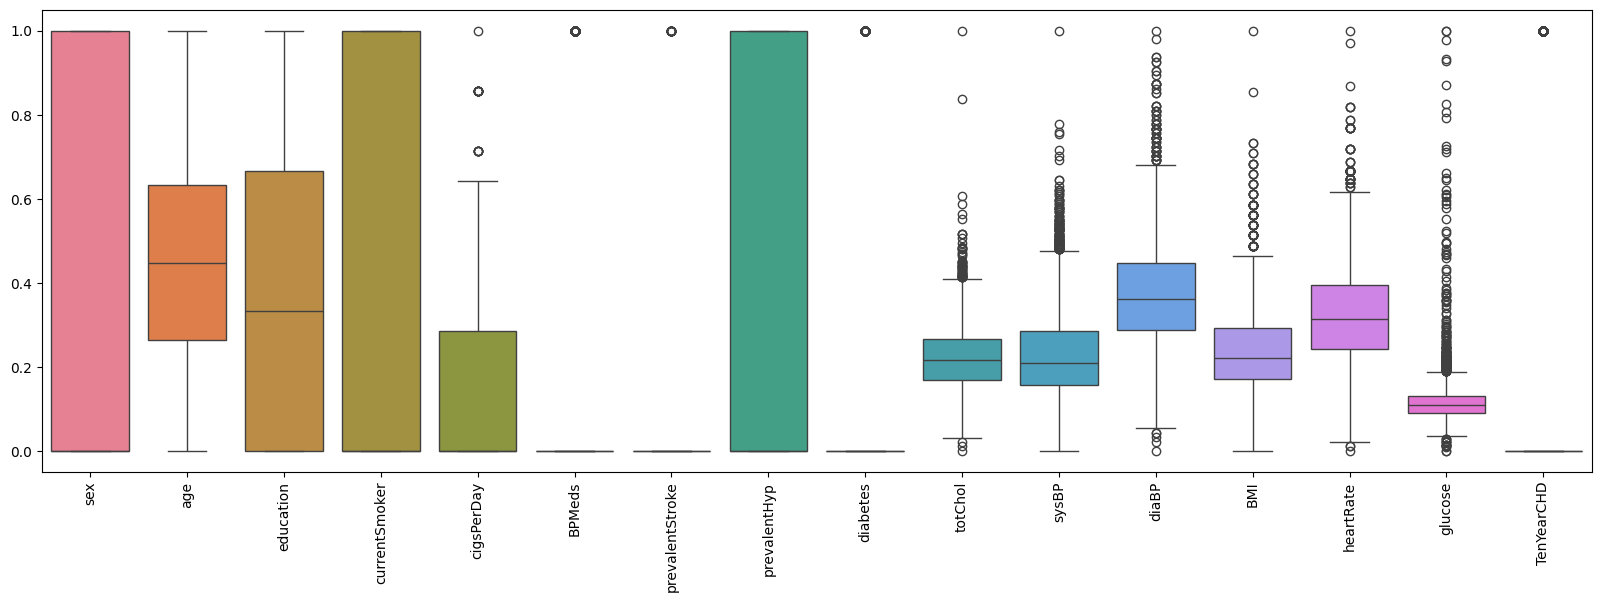

In [5]:
plt.figure(figsize=(20, 6))
normalized_df=(df-df.min())/(df.max()-df.min())
sns.boxplot(normalized_df)
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x1000 with 0 Axes>

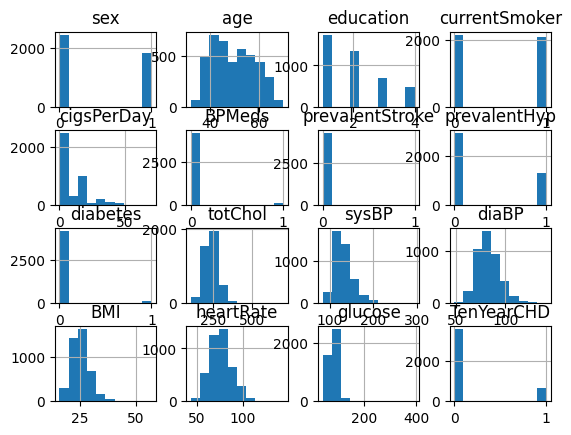

In [6]:
plt.figure(figsize=(20, 10))
df.hist()
plt.show()

In [7]:
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979245,0.494104,9.067689,0.029245,0.005896,0.310613,0.025708,236.752830,132.353774,82.891981,25.801651,75.879009,81.817217,0.151887
std,0.495027,8.572942,1.007658,0.500024,11.906251,0.168513,0.076569,0.462799,0.158280,44.355512,22.032067,11.910856,4.086704,12.023930,23.013701,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,84.000000,48.000000,16.000000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.000000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.000000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.000000,83.000000,86.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.000000,57.000000,143.000000,394.000000,1.000000


In [8]:
df.TenYearCHD.value_counts()

TenYearCHD
0.0    3596
1.0     644
Name: count, dtype: int64

# OHE dummmies

In [9]:
df = pd.get_dummies(df,columns = ['education'])
df.describe()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.067689,0.029245,0.005896,0.310613,0.025708,236.752830,132.353774,82.891981,25.801651,75.879009,81.817217,0.151887
std,0.495027,8.572942,0.500024,11.906251,0.168513,0.076569,0.462799,0.158280,44.355512,22.032067,11.910856,4.086704,12.023930,23.013701,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,84.000000,48.000000,16.000000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.000000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.000000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.000000,83.000000,86.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.000000,57.000000,143.000000,394.000000,1.000000


# Odd - Ratio

In [10]:
df.columns

Index(['sex', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0'],
      dtype='object')

In [11]:
df.prevalentStroke.value_counts()

dff = df[df.prevalentStroke == 1]
dff.describe()
dff.age.value_counts()

age
52.0    4
58.0    3
60.0    3
65.0    2
53.0    2
63.0    2
38.0    1
70.0    1
67.0    1
54.0    1
41.0    1
47.0    1
42.0    1
56.0    1
61.0    1
Name: count, dtype: int64

1.63485065579191


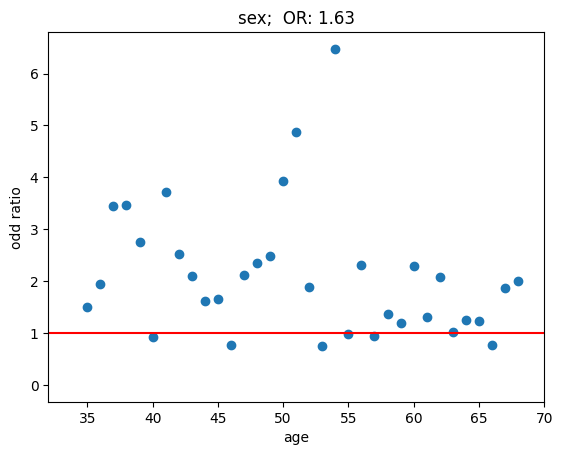

1.1144928118076871


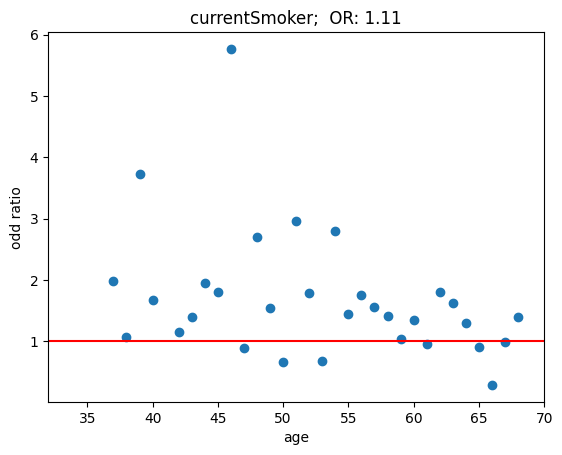

2.8778397170772645


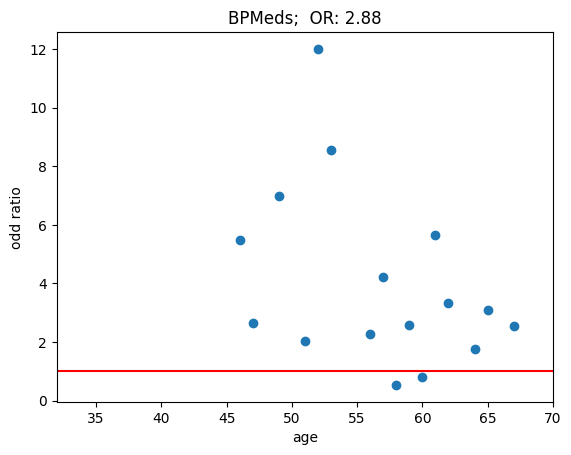

4.4461746784021665


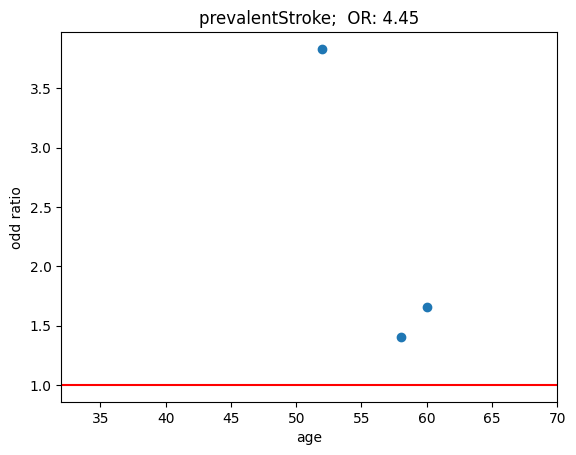

2.674373040752351


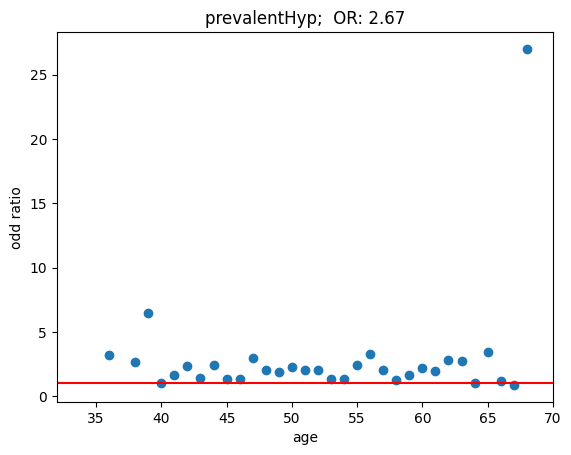

3.3851617237738747


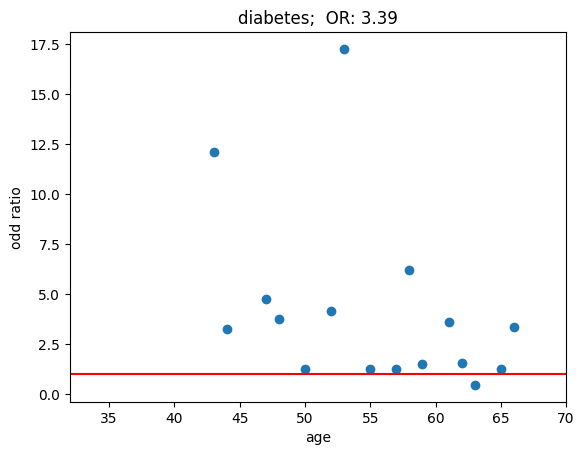

1.5881785714285714


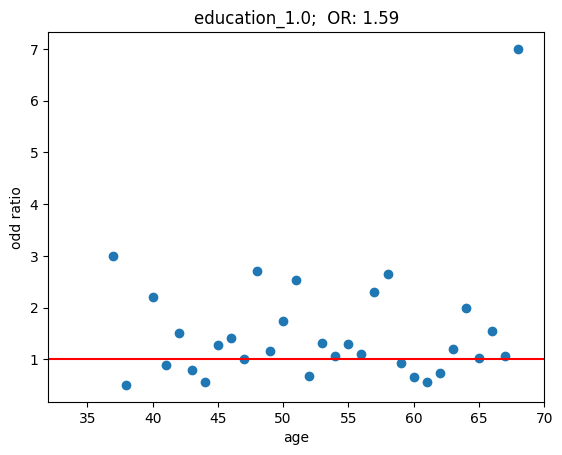

0.6786897582491089


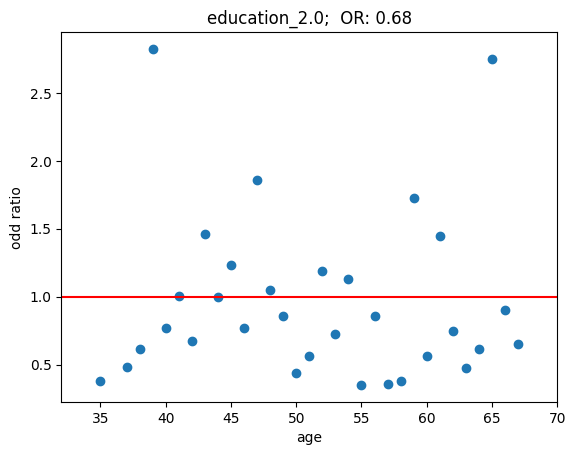

0.7871603049786084


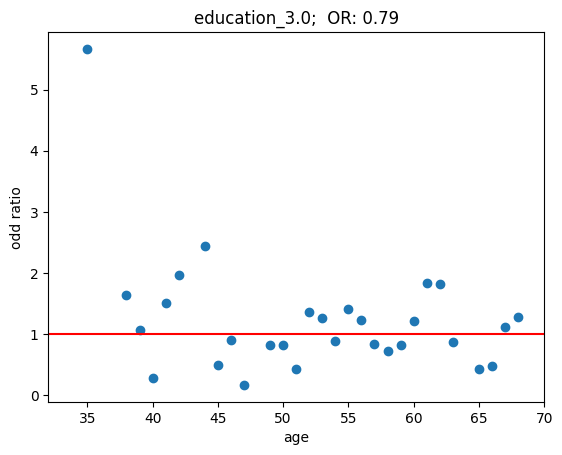

0.9662288930581614


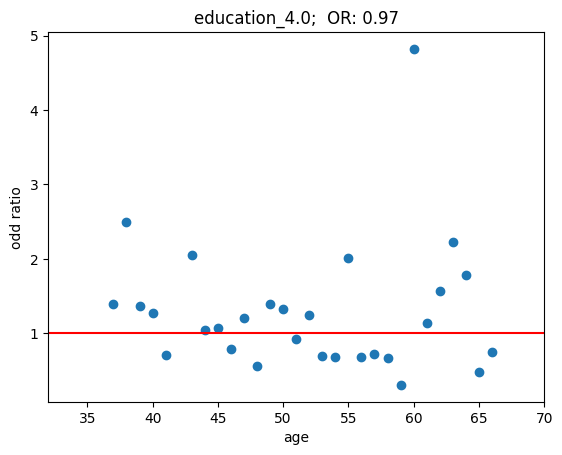

In [13]:
# Confusionmatrix
#  00 TN         01 FP
#  10 FN         11 TP
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import fisher_exact
vals = df.age.value_counts().index.sort_values()

binaries = np.empty(1, dtype=str)
for i in df.columns:
    if (df[i].max() == 1) & (df[i].min() == 0):
        binaries = np.append(binaries, i)
binaries = binaries[binaries !='']
binaries = binaries[binaries !='TenYearCHD']

# binaries = ['prevalentStroke']

for topic in binaries:
    ploot = np.empty([1, 2])

    # Calculate OD over all the features
    avg = confusion_matrix(df[topic],df['TenYearCHD'], labels=[0, 1])
    TN = avg[0][0]
    FP = avg[0][1]
    FN = avg[1][0]
    TP = avg[1][1]
    odds_ratio, p_value = fisher_exact(avg, alternative='two-sided')
    print(odds_ratio)
    avg = (TP*TN)/(FP*FN) if FN*FP != 0 else np.nan



    for nr, i in enumerate(vals):
        df_age = df[df.age == i]
        if df_age.shape[0] < 1:
            continue

        try:
            cm = confusion_matrix(df_age[topic],df_age['TenYearCHD'], labels=[0, 1])
        except:
            print('upsi')
            continue

        if cm.shape == (2,2):
            TN = cm[0][0]
            FP = cm[0][1]
            FN = cm[1][0]
            TP = cm[1][1]
            # print('TP(ED): ',TP, 'FP(ND): ', FP)
            # print('FN(EH): ',FN, 'TN(NH): ', TN)
            OR_calc = (TP*TN)/(FP*FN) if TN*TP != 0 and FN*FP != 0 else np.nan
            # print('Age: ',i , 'Oddratio: ',OR_calc)
            if OR_calc != np.nan:
                ploot = np.append(ploot, [[i,OR_calc]], axis = 0)

    if ploot.size > 10:
        plt.scatter(ploot[:,0], ploot[:,1])
        plt.xlim(df.age.min(),df.age.max())
        plt.xlabel('age')
        plt.ylabel('odd ratio')
        plt.title(f'{topic};  OR: {np.round(avg,2)}')
        plt.axhline(1, color = 'red')
        plt.show()

# Linear Regression

m:  1.449870736805749
b:  12.17111582565515


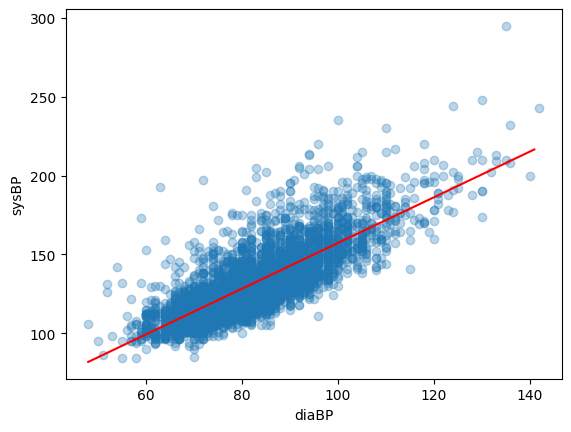

In [ ]:
# Linear Regression between the numbers.
from sklearn.linear_model import LinearRegression
# Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
#       dtype='object')

X = 'diaBP'
y = 'sysBP'
model = LinearRegression()

fitting = model.fit(df[[X]], df[y])
print('m: ',fitting.coef_[0])
print('b: ',fitting.intercept_)

x = np.arange(df[X].min().astype(int),df[X].max().astype(int))

x = pd.DataFrame(x, columns = [X])
y_pred= model.predict(x)

plt.scatter(df[X], df[y], alpha = 0.3)
# print(y_pred, arr)

plt.plot(x, y_pred, color = 'red')
plt.ylabel(y)
plt.xlabel(X)
plt.show()